In [ ]:
# Code mounting to Google Drive for running in Google Colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Import packages for manipulating data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scstat 

In [ ]:
# Import all necessary dataframes
species_data = pd.read_csv("/content/drive/Shareddrives/Airborne/Airborne/Data_raw/filesToStack10058/stackedFiles/div_10m2Data100m2Data.csv")
humidity_data = pd.read_csv("/content/drive/Shareddrives/Airborne/Airborne/Data_raw/filesToStack00001/stackedFiles/wss_daily_humid.csv")
precip_data = pd .read_csv("/content/drive/Shareddrives/Airborne/Airborne/Data_raw/filesToStack00001/stackedFiles/wss_daily_precip.csv")
temp_data = pd.read_csv("/content/drive/Shareddrives/Airborne/Airborne/Data_raw/filesToStack00001/stackedFiles/wss_daily_temp.csv")
wind_data = pd.read_csv("/content/drive/Shareddrives/Airborne/Airborne/Data_raw/filesToStack00001/stackedFiles/wss_daily_wind.csv") 
chm_data_HARV = pd.read_csv("/content/drive/Shareddrives/Airborne/Airborne/Data_raw/DP3.30015.001/CHM_HARV_2017.csv")
chm_data_NIWO = pd.read_csv("/content/drive/Shareddrives/Airborne/Airborne/Data_raw/DP3.30015.001/CHM_NIWO_2017.csv")
chm_data_OSBS = pd.read_csv("/content/drive/Shareddrives/Airborne/Airborne/Data_raw/DP3.30015.001/CHM_OSBS_2017.csv")

# Weather Data
Clean weather data and calculate mean values for each site and appropriate time period

Humidity Data

In [ ]:
# Filter for quality flags and needed columns
humidity_data = humidity_data[humidity_data["RHQF"] == 0]
humidity_data = humidity_data.drop(columns=["domainID", "horizontalPosition", "verticalPosition", 
                                            "wssRHMinimum", "wssRHMaximum", "wssRHVariance", "wssRHStdErMean", 
                                            "wssRHNumPts", "RHQF", "wssDewTempMean", "wssDewTempMinimum", 
                                            "wssDewTempMaximum", "wssDewTempVariance", "wssDewTempStdErMean", 
                                            "wssDewTempNumPts", "dewTempQF", "publicationDate", "release"])

In [ ]:
# Create proper datetime column
humidity_data["datetime"] = pd.to_datetime(humidity_data["date"])
humidity_data = humidity_data.drop(columns=["date"])

In [ ]:
# Create month and year columns 
humidity_data["month"] = humidity_data["datetime"].dt.month
humidity_data["year"] = humidity_data["datetime"].dt.year

In [ ]:
# Calculate mean humidity
humidity_mean_HARV_7 = humidity_data.loc[(humidity_data["siteID"]=="HARV") & (humidity_data["month"] == 7)].mean().wssRHMean
humidity_mean_OSBS_9 = humidity_data.loc[(humidity_data["siteID"]=="OSBS") & (humidity_data["month"] == 9)].mean().wssRHMean
humidity_mean_NIWO_7 = humidity_data.loc[(humidity_data["siteID"]=="NIWO") & (humidity_data["month"] == 7)].mean().wssRHMean
humidity_mean_NIWO_8 = humidity_data.loc[(humidity_data["siteID"]=="NIWO") & (humidity_data["month"] == 8)].mean().wssRHMean
humidity_mean_NIWO_9 = humidity_data.loc[(humidity_data["siteID"]=="NIWO") & (humidity_data["month"] == 9)].mean().wssRHMean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeErro

Temp Data

In [ ]:
# Filter for quality flags and needed columns
temp_data = temp_data[temp_data["tempTripleQF"] == 0]
temp_data = temp_data.drop(columns=["domainID", "horizontalPosition", "verticalPosition", "wssTempTripleMinimum", "wssTempTripleMaximum", "wssTempTripleVariance", 
                                    "wssTempTripleStdErMean", "wssTempTripleNumPts", "tempTripleQF", "publicationDate", "release"])

In [ ]:
 # Create proper datetime column
temp_data["datetime"] = pd.to_datetime(temp_data["date"])
temp_data = temp_data.drop(columns=["date"])

In [ ]:
# Create month and year columns 
temp_data["month"] = temp_data["datetime"].dt.month
temp_data["year"] = temp_data["datetime"].dt.year

In [ ]:
# Calculate mean temperature values by site and month
temp_mean_HARV_7 = temp_data.loc[(temp_data["siteID"]=="HARV") & (temp_data["month"] == 7)].mean().wssTempTripleMean
temp_mean_OSBS_9 = temp_data.loc[(temp_data["siteID"]=="OSBS") & (temp_data["month"] == 9)].mean().wssTempTripleMean
temp_mean_NIWO_7 = temp_data.loc[(temp_data["siteID"]=="NIWO") & (temp_data["month"] == 7)].mean().wssTempTripleMean
temp_mean_NIWO_8 = temp_data.loc[(temp_data["siteID"]=="NIWO") & (temp_data["month"] == 8)].mean().wssTempTripleMean
temp_mean_NIWO_9 = temp_data.loc[(temp_data["siteID"]=="NIWO") & (temp_data["month"] == 9)].mean().wssTempTripleMean


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeErro

Wind Data

In [ ]:
# Filter for quality flags and needed columns
wind_data = wind_data[wind_data["windSpeedQF"] == 0]
wind_data = wind_data.drop(columns=["domainID", "horizontalPosition", "verticalPosition", "wssWindSpeedMinimum", "wssWindSpeedMaximum", 
                                    "wssWindSpeedVariance", "wssWindSpeedStdErMean", "wssWindSpeedNumPts", "windSpeedQF", "publicationDate", "release"])

In [ ]:
# Create proper datetime column
wind_data["datetime"] = pd.to_datetime(wind_data["date"])
wind_data = wind_data.drop(columns=["date"])

In [ ]:
# Create month and year columns 
wind_data["month"] = wind_data["datetime"].dt.month
wind_data["year"] = wind_data["datetime"].dt.year

In [ ]:
# Calculate mean wind speed values by site and month
wind_mean_HARV_7 = wind_data.loc[(wind_data["siteID"]=="HARV") & (wind_data["month"] == 7)].mean().wssWindSpeedMean
wind_mean_OSBS_9 = wind_data.loc[(wind_data["siteID"]=="OSBS") & (wind_data["month"] == 9)].mean().wssWindSpeedMean
wind_mean_NIWO_7 = wind_data.loc[(wind_data["siteID"]=="NIWO") & (wind_data["month"] == 7)].mean().wssWindSpeedMean
wind_mean_NIWO_8 = wind_data.loc[(wind_data["siteID"]=="NIWO") & (wind_data["month"] == 8)].mean().wssWindSpeedMean
wind_mean_NIWO_9 = wind_data.loc[(wind_data["siteID"]=="NIWO") & (wind_data["month"] == 9)].mean().wssWindSpeedMean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeErro

Precip Data

In [ ]:
# Filter for quality flags and needed columns
precip_data = precip_data[precip_data["precipQF"] == 0]
precip_data = precip_data.drop(columns=["domainID", "horizontalPosition", "verticalPosition", "precipQF", "publicationDate", "release"])

In [ ]:
# Create proper datetime column
precip_data["datetime"] = pd.to_datetime(precip_data["date"])
precip_data = precip_data.drop(columns=["date"])

In [ ]:
# Create month and year columns 
precip_data["month"] = precip_data["datetime"].dt.month
precip_data["year"] = precip_data["datetime"].dt.year

In [ ]:
# Calculate mean precipitation by site and month
precip_mean_HARV_7 = precip_data.loc[(precip_data["siteID"]=="HARV") & (precip_data["month"] == 7)].mean().wssPrecipTotal
precip_mean_OSBS_7 = precip_data.loc[(precip_data["siteID"]=="OSBS") & (precip_data["month"] == 7)].mean().wssPrecipTotal # the only passing data for OSBS is July
precip_mean_NIWO_7 = precip_data.loc[(precip_data["siteID"]=="NIWO") & (precip_data["month"] == 7)].mean().wssPrecipTotal
precip_mean_NIWO_8 = precip_data.loc[(precip_data["siteID"]=="NIWO") & (precip_data["month"] == 8)].mean().wssPrecipTotal
precip_mean_NIWO_9 = precip_data.loc[(precip_data["siteID"]=="NIWO") & (precip_data["month"] == 9)].mean().wssPrecipTotal

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will

# Species Data
Clean species data, add mean weather values to the dataframe, count unique taxonID's by plotID

In [ ]:
# Create proper datetime column and drop unnecessary columns
species_data["datetime"] = pd.to_datetime(species_data["endDate"])
species_data = species_data.drop(columns=["uid", "namedLocation", "domainID", "decimalLatitude", "decimalLongitude", "geodeticDatum", "coordinateUncertainty",
                                          "elevationUncertainty", "plotType", "subplotID", "boutNumber", "eventID", "samplingProtocolVersion", "targetTaxaPresent",
                                          "family", "nativeStatusCode", "identificationQualifier", "taxonIDRemarks", "identificationReferences", "morphospeciesID",
                                          "morphospeciesIDRemarks", "additionalSpecies", "remarks", "measuredBy", "recordedBy", "samplingImpractical",
                                          "samplingImpracticalRemarks", "endDate", "biophysicalCriteria", "publicationDate", "release"])

In [ ]:
# Species Data: Create month and year columns
species_data["month"] = species_data["datetime"].dt.month
species_data["year"] = species_data["datetime"].dt.year

In [ ]:
# Sort dataframe by plotID in ascending order
species_data = species_data.sort_values(by="plotID").reset_index(drop=True)

In [ ]:
# Add mean temperature values for appropriate site and months
species_data.loc[(species_data["siteID"]=="HARV") & (species_data["month"] == 7), "tempMean"] = temp_mean_HARV_7
species_data.loc[(species_data["siteID"]=="OSBS") & (species_data["month"] == 9), "tempMean"] = temp_mean_OSBS_9
species_data.loc[(species_data["siteID"]=="NIWO") & (species_data["month"] == 7), "tempMean"] = temp_mean_NIWO_7
species_data.loc[(species_data["siteID"]=="NIWO") & (species_data["month"] == 8), "tempMean"] = temp_mean_NIWO_8
species_data.loc[(species_data["siteID"]=="NIWO") & (species_data["month"] == 9), "tempMean"] = temp_mean_NIWO_9

In [ ]:
# Add mean humidity values for appropriate site and months
species_data.loc[(species_data["siteID"]=="HARV") & (species_data["month"] == 7), "RHMean"] = humidity_mean_HARV_7
species_data.loc[(species_data["siteID"]=="OSBS") & (species_data["month"] == 9), "RHMean"] = humidity_mean_OSBS_9
species_data.loc[(species_data["siteID"]=="NIWO") & (species_data["month"] == 7), "RHMean"] = humidity_mean_NIWO_7
species_data.loc[(species_data["siteID"]=="NIWO") & (species_data["month"] == 8), "RHMean"] = humidity_mean_NIWO_8
species_data.loc[(species_data["siteID"]=="NIWO") & (species_data["month"] == 9), "RHMean"] = humidity_mean_NIWO_9

In [ ]:
# Add mean wind speed values for appropriate site and months
species_data.loc[(species_data["siteID"]=="HARV") & (species_data["month"] == 7), "windMean"] = wind_mean_HARV_7
species_data.loc[(species_data["siteID"]=="OSBS") & (species_data["month"] == 9), "windMean"] = wind_mean_OSBS_9
species_data.loc[(species_data["siteID"]=="NIWO") & (species_data["month"] == 7), "windMean"] = wind_mean_NIWO_7
species_data.loc[(species_data["siteID"]=="NIWO") & (species_data["month"] == 8), "windMean"] = wind_mean_NIWO_8
species_data.loc[(species_data["siteID"]=="NIWO") & (species_data["month"] == 9), "windMean"] = wind_mean_NIWO_9

In [ ]:
# Add mean precipitation values for appropriate site and months
species_data.loc[(species_data["siteID"]=="HARV") & (species_data["month"] == 7), "precipMean"] = precip_mean_HARV_7
species_data.loc[(species_data["siteID"]=="OSBS") & (species_data["month"] == 9), "precipMean"] = precip_mean_OSBS_7 # must compare different months due to lack of passing OSBS precip data
species_data.loc[(species_data["siteID"]=="NIWO") & (species_data["month"] == 7), "precipMean"] = precip_mean_NIWO_7
species_data.loc[(species_data["siteID"]=="NIWO") & (species_data["month"] == 8), "precipMean"] = precip_mean_NIWO_8
species_data.loc[(species_data["siteID"]=="NIWO") & (species_data["month"] == 9), "precipMean"] = precip_mean_NIWO_9

In [ ]:
# Count the number of unique taxon ID per plot
plots = species_data["plotID"].unique() # Create an array of all the unique plotID's in the dataframe

for i in range(len(plots)): # Iterate through each unique plotID
  # Create a new column speciesCount for the dataframe; get the number of unique taxonID for each unique plotID, match this number up as the speciesCount entry for every row with the same plotID value
  species_data.loc[(species_data["plotID"]==plots[i]), "speciesCount"] = species_data.loc[(species_data["plotID"]==plots[i]), "taxonID"].unique().size

In [ ]:
# Drop taxonID, scientificName, taxonRank
species_data = species_data.drop(columns=["taxonID", "scientificName", "taxonRank"])

# At this point, separate rows with the same plotID are duplicates, drop them as they are no longer needed
species_data = species_data.drop_duplicates(ignore_index=True)

# Canopy Height Model Data
Clean data and merge CHM data with previously cleaned and merged data

In [ ]:
# Drop unnecessary columns
chm_data_HARV = chm_data_HARV.drop(columns=["median", "stdev", "min", "max"])
chm_data_NIWO = chm_data_NIWO.drop(columns=["median", "stdev", "min", "max"])
chm_data_OSBS = chm_data_OSBS.drop(columns=["median", "stdev", "min", "max"])

In [ ]:
# Rename CHM mean column
chm_data_HARV.rename(columns={"mean":"CHMmean"}, inplace=True)
chm_data_NIWO.rename(columns={"mean":"CHMmean"}, inplace=True)
chm_data_OSBS.rename(columns={"mean":"CHMmean"}, inplace=True)

In [ ]:
# Merge CHM dataframes with species_data
all_data_HARV = species_data.merge(chm_data_HARV, on=["plotID", "year"])
all_data_NIWO = species_data.merge(chm_data_NIWO, on=["plotID", "year"])
all_data_OSBS = species_data.merge(chm_data_OSBS, on=["plotID", "year"])

In [ ]:
# Create final dataframe by concatenating the previous three dataframes 
all_data = pd.concat([all_data_HARV, all_data_NIWO, all_data_OSBS], ignore_index=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   siteID        58 non-null     object        
 1   elevation     58 non-null     float64       
 2   nlcdClass     58 non-null     object        
 3   plotID        58 non-null     object        
 4   datetime      58 non-null     datetime64[ns]
 5   month         58 non-null     int64         
 6   year          58 non-null     int64         
 7   tempMean      58 non-null     float64       
 8   RHMean        58 non-null     float64       
 9   windMean      58 non-null     float64       
 10  precipMean    58 non-null     float64       
 11  speciesCount  58 non-null     float64       
 12  CHMmean       58 non-null     float64       
dtypes: datetime64[ns](1), float64(7), int64(2), object(3)
memory usage: 6.0+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ec3119910>]],
      dtype=object)

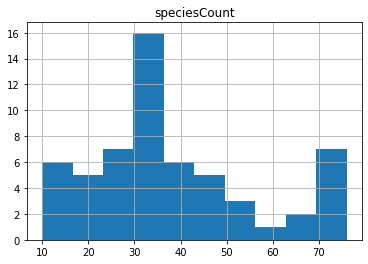

In [ ]:
# Check for any outliers in data - no removal necessary
all_data.hist(column="speciesCount")

# Data Analysis

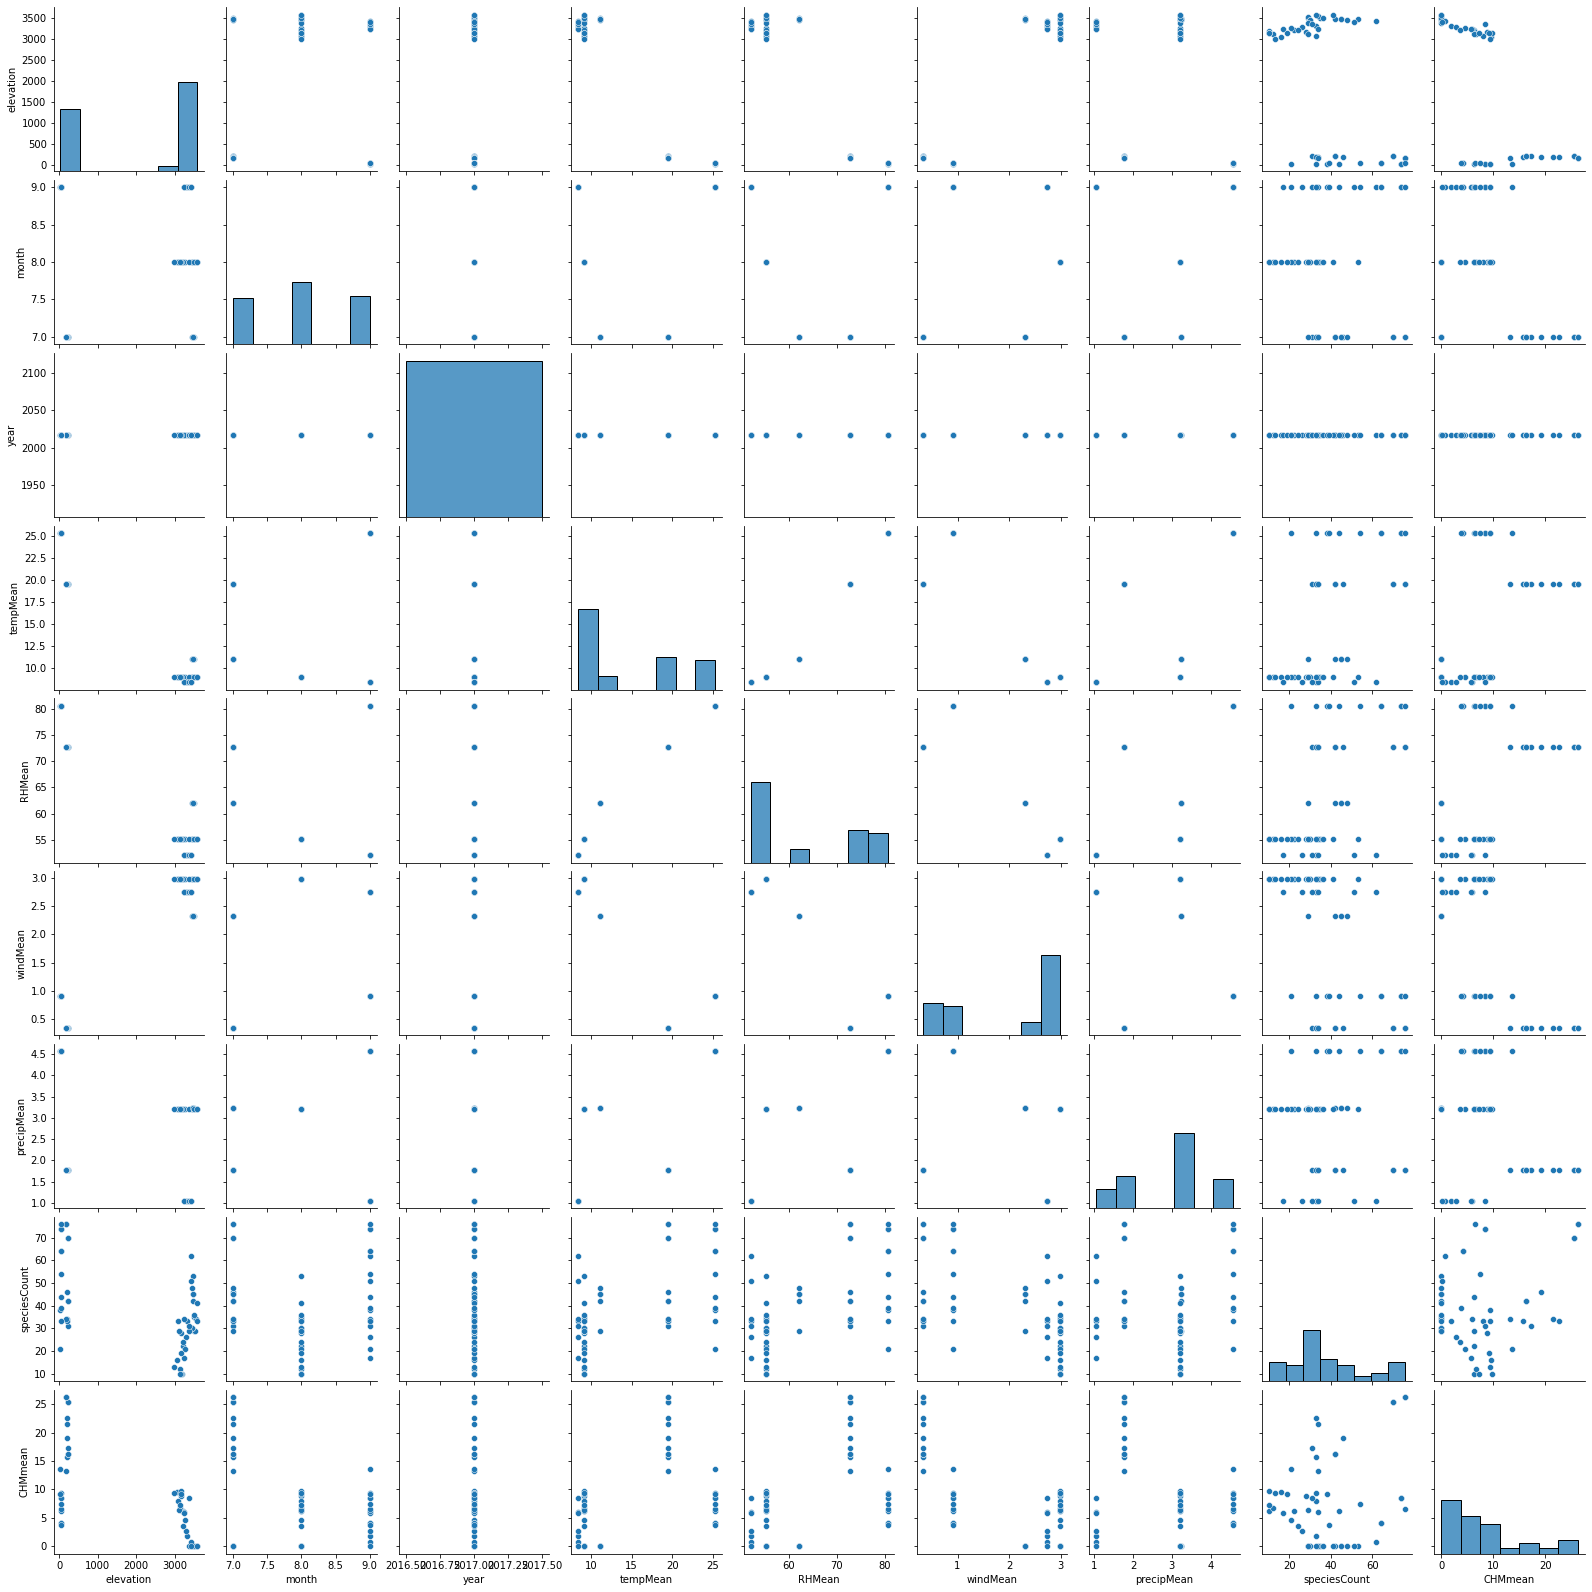

In [ ]:
# Pairplot of all data variables
sns.pairplot(all_data)

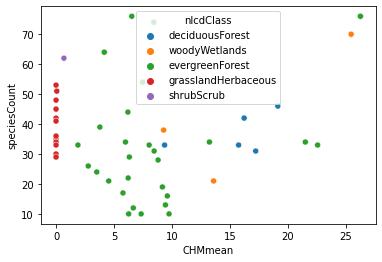

In [ ]:
# Scatterplot of canopy height vs. species count - hue by ncldClass (National Land Cover Vegetation Type Name) to explain the group of values at CHMmean = 0
sns.scatterplot(data=all_data, x = "CHMmean", y = "speciesCount", hue = "nlcdClass", legend = True)

In [ ]:
# Separate dataframe by nlcdClass
deciduous_forest_data = all_data[all_data["nlcdClass"] == "deciduousForest"]
woody_wetlands_data = all_data[all_data["nlcdClass"] == "woodyWetlands"]
evergreen_forest_data = all_data[all_data["nlcdClass"] == "evergreenForest"]
grassland_herbaceous_data = all_data[all_data["nlcdClass"] == "grasslandHerbaceous"]
shrub_scrub_all = all_data[all_data["nlcdClass"] == "shrubScrub"]

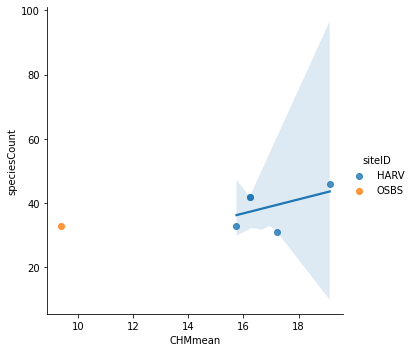

In [ ]:
# # Linear regression with only deciduous forest data of canopy height vs. species count
sns.lmplot(data=deciduous_forest_data, x = "CHMmean", y = "speciesCount", hue="siteID")

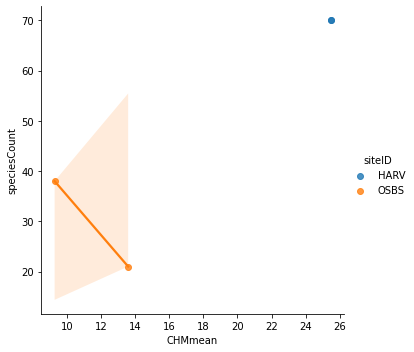

In [ ]:
# Linear regression with only woody wetlands data of canopy height vs. species count
sns.lmplot(data=woody_wetlands_data, x = "CHMmean", y = "speciesCount", hue="siteID")

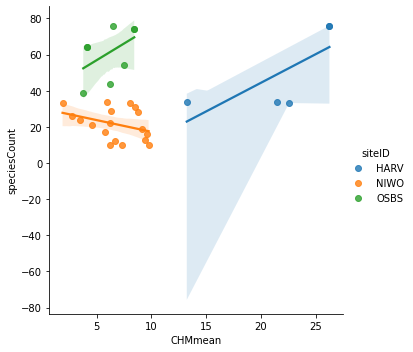

In [ ]:
# Linear regression with only evergreen forest data of canopy height vs. species count
sns.lmplot(data=evergreen_forest_data, x = "CHMmean", y = "speciesCount", hue="siteID")

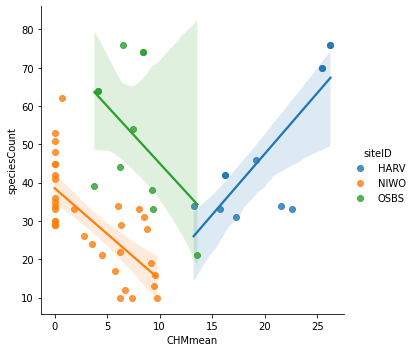

In [ ]:
# Linear regression with all data of canopy height vs. species count
sns.lmplot(data=all_data, x = "CHMmean", y = "speciesCount", hue="siteID")

In [ ]:
# Trim off data from grasslands
all_data_trimmed = all_data[all_data["nlcdClass"] != "grasslandHerbaceous"]

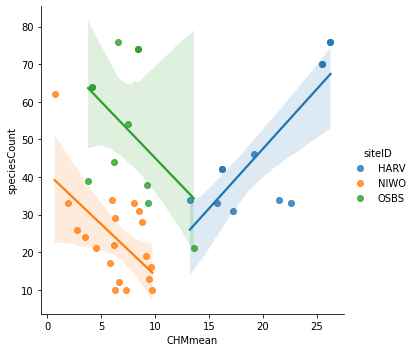

In [ ]:
# Linear regresion with data from grasslands trimmed off of canopy height v. species count 
sns.lmplot(data=all_data_trimmed, x = "CHMmean", y = "speciesCount", hue="siteID")

In [ ]:
# Separate trimmed data frame by siteID
all_data_trimmed_HARV = all_data_trimmed[all_data_trimmed["siteID"]=="HARV"]
all_data_trimmed_NIWO = all_data_trimmed[all_data_trimmed["siteID"]=="NIWO"]
all_data_trimmed_OSBS = all_data_trimmed[all_data_trimmed["siteID"]=="OSBS"]

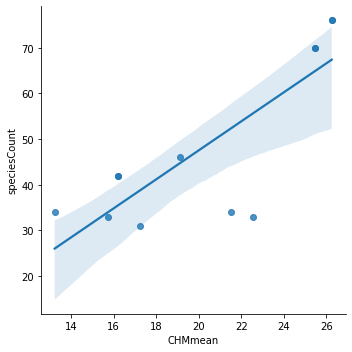

In [ ]:
# Plot of all trimmed data, HARV only
sns.lmplot(data=all_data_trimmed_HARV, x = "CHMmean", y = "speciesCount")

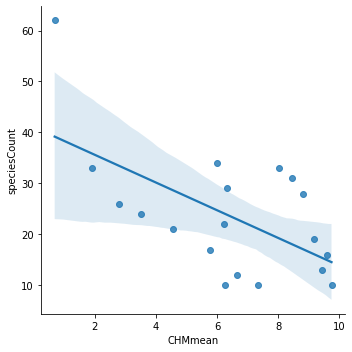

In [ ]:
# Plot of all trimmed data, NIWO only
sns.lmplot(data=all_data_trimmed_NIWO, x = "CHMmean", y = "speciesCount")

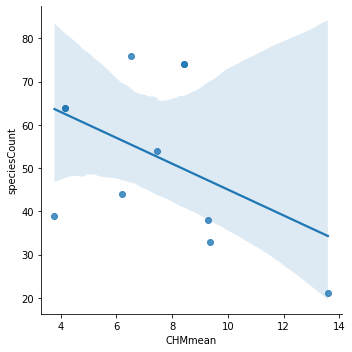

In [ ]:
# Plot of all trimmed data, OSBS only
sns.lmplot(data=all_data_trimmed_OSBS, x = "CHMmean", y = "speciesCount")

In [ ]:
# Separate evergreen forest data by site
evergreen_forest_data_HARV = evergreen_forest_data[evergreen_forest_data["siteID"] == "HARV"]
evergreen_forest_data_NIWO = evergreen_forest_data[evergreen_forest_data["siteID"] == "NIWO"]
evergreen_forest_data_OSBS = evergreen_forest_data[evergreen_forest_data["siteID"] == "OSBS"]

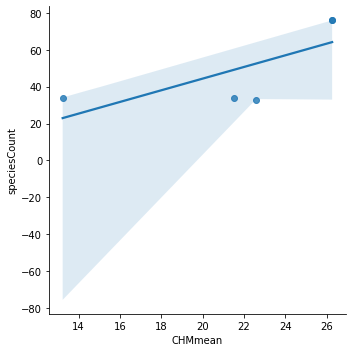

In [ ]:
# Evergreen forest plot, HARV only
sns.lmplot(data=evergreen_forest_data_HARV, x = "CHMmean", y = "speciesCount")

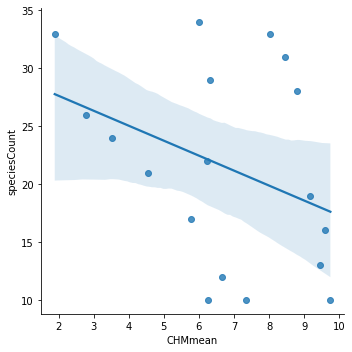

In [ ]:
# Evergreen forest plot, NIWO only
sns.lmplot(data=evergreen_forest_data_NIWO, x = "CHMmean", y = "speciesCount")

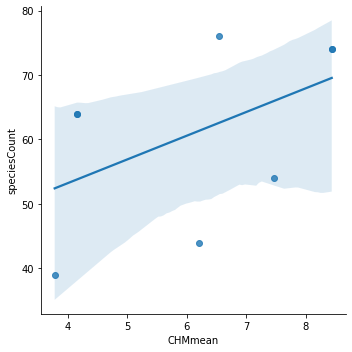

In [ ]:
# Evergreen forest plot, OSBS only
sns.lmplot(data=evergreen_forest_data_OSBS, x = "CHMmean", y = "speciesCount")

In [ ]:
# Calculate linear regression variables
slope, intercept, r_value, p_value, std_err = scstat.linregress(x = all_data_trimmed["CHMmean"], y = all_data_trimmed["speciesCount"])

In [ ]:
# Calculate proper r^2 value
r_value**2

0.1176719554293693

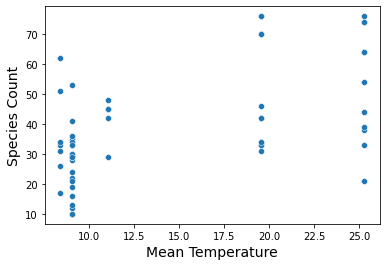

In [ ]:
# Make scatter plots with readable labels for corresponding weather variables
tempplot = sns.scatterplot(data = all_data, x = "tempMean", y = "speciesCount")
tempplot.set_xlabel("Mean Temperature", fontsize = 14)
tempplot.set_ylabel("Species Count", fontsize = 14)
tempplot

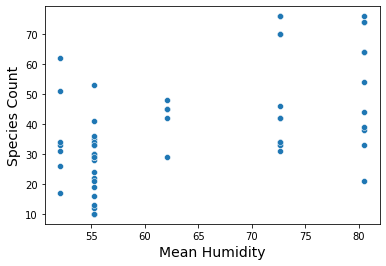

In [ ]:
RHplot = sns.scatterplot(data = all_data, x = "RHMean", y = "speciesCount")
RHplot.set_xlabel("Mean Humidity", fontsize = 14)
RHplot.set_ylabel("Species Count", fontsize = 14)
RHplot

Text(0, 0.5, 'Species Count')

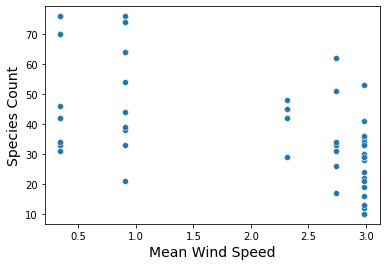

In [ ]:
windplot = sns.scatterplot(data = all_data, x = "windMean", y = "speciesCount")
windplot.set_xlabel("Mean Wind Speed", fontsize = 14)
windplot.set_ylabel("Species Count", fontsize = 14)

Text(0, 0.5, 'Species Count')

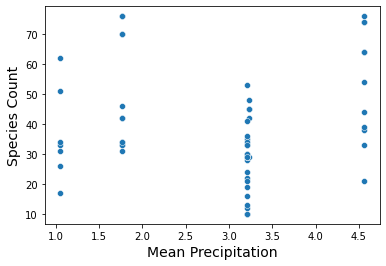

In [ ]:
preciplot = sns.scatterplot(data = all_data, x = "precipMean", y = "speciesCount")
preciplot.set_xlabel("Mean Precipitation", fontsize = 14)
preciplot.set_ylabel("Species Count", fontsize = 14)

Text(0, 0.5, 'Species Count')

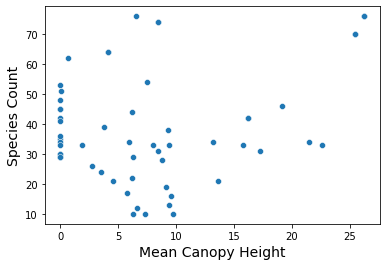

In [ ]:
canoplot = sns.scatterplot(data = all_data, x = "CHMmean", y = "speciesCount")
canoplot.set_xlabel("Mean Canopy Height", fontsize = 14)
canoplot.set_ylabel("Species Count", fontsize = 14)